## Exploratory data analysis on Haberman's Survival Data Set

## Dataset 

Dataset :[https://www.kaggle.com/gilsousa/habermans-survival-data-set]
* Title: Haberman's Survival Data
* Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
* Number of Instances: 306
* Number of Attributes: 4 (including the class attribute):
* Attribute Information:
     * Age of patient at time of operation (numerical)
     * Patient's year of operation (year - 1900, numerical)
     * Number of positive axillary nodes detected (numerical)
     * Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



df = pd.read_csv('haberman.csv')
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [7]:
print(df.columns)
print("<--------------***------------->")
print("30 => Age of patient's at time of operation")
print("64 => Year in which operation is conducted")
print("1 => Number of auxilary nodes dectected")
print("1.1 => classes(1-Survived for more than five and 2-survived for less than five)")

Index(['30', '64', '1', '1.1'], dtype='object')
<--------------***------------->
30 => Age of patient's at time of operation
64 => Year in which operation is conducted
1 => Number of auxilary nodes dectected
1.1 => classes(1-Survived for more than five and 2-survived for less than five)


In [8]:
survived,not_survived =df["1.1"].value_counts()
print("Survived More than 5 years:",survived)
print("Not Survived More than 5 years:",not_survived)

Survived More than 5 years: 224
Not Survived More than 5 years: 81


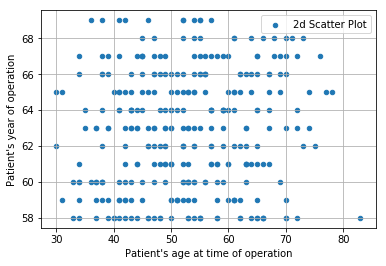

In [9]:
df.plot(kind='scatter',x='30',y='64',label='2d Scatter Plot')
plt.grid()
plt.legend()
plt.xlabel("Patient's age at time of operation")
plt.ylabel("Patient's year of operation")
plt.show()

### Observation from 2d scatter plot between "age" ,"time of operation"

* min Age is 30 at time of operation

### 2d Scatter Plot for both classes "1" and "2" between

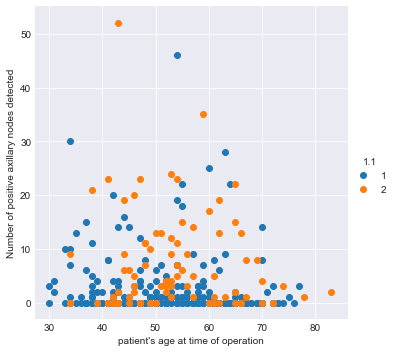

In [10]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="1.1",size=5).map(plt.scatter,"30","1").add_legend()
plt.xlabel("patient's age at time of operation")
plt.ylabel("Number of positive axillary nodes detected")
plt.show()



# Observation
#Nothing much can be infered 

### Pair plot the data
* Reason for pair plotting: nothing can be much infered from the above analysis so pair plots will be a better option to try out all posibilities exist

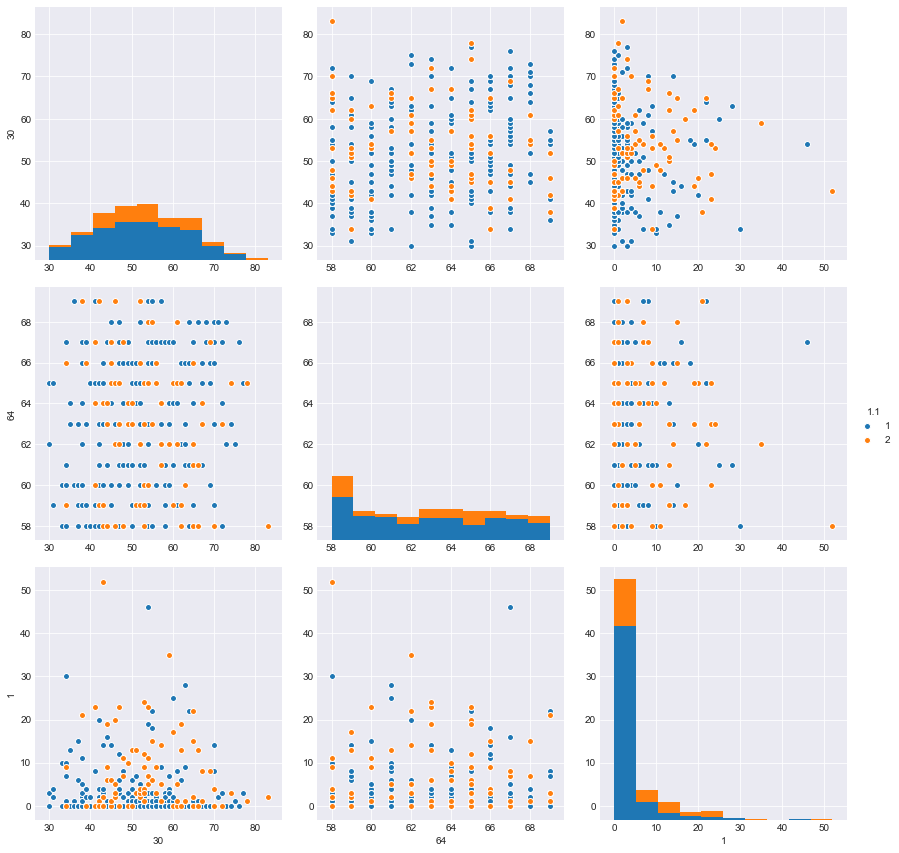

In [22]:
plt.close();
sns.set_style("darkgrid");
sns.pairplot(df,hue="1.1" ,vars=['30','64','1'],size=4);
plt.show()


### Observation Form pairplots
* 99.01 % patient's detected auxilary nodes are less than 30
* Minimum age of cancer operation is 30
* Maximum survival age is 77
* max survival year is 1958 (survival year:- number of patient's survived in that particular year)

### Histogram,Pdf,Cdf

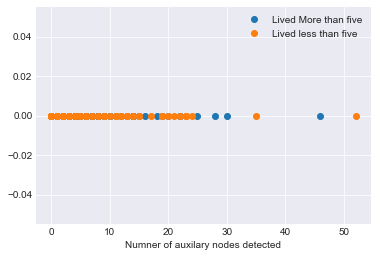

In [27]:
live_more_5=df.loc[df["1.1"] == 1]
live_less_5=df.loc[df["1.1"] == 2]
plt.plot(live_more_5["1"],np.zeros_like(live_more_5["1"]),'o',label="Lived More than five")
plt.plot(live_less_5["1"],np.zeros_like(live_less_5["1"]),'o',label="Lived less than five")
plt.xlabel("Numner of auxilary nodes detected")
plt.legend()
plt.show()

### Observation using 1d plot using number of auxilary nodes
* Nothing much can be infered

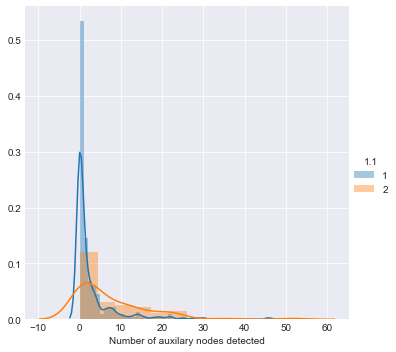

In [52]:
sns.FacetGrid(df,hue="1.1",size=5).map(sns.distplot,"1").add_legend();
plt.xlabel("Number of auxilary nodes detected")
plt.show()

### Observation
* General Inference :Lesser the number of auxilary nodes higher the chances of survival


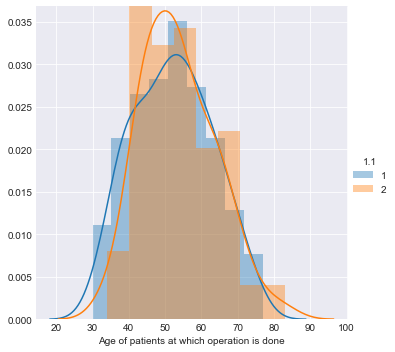

83


In [23]:
sns.FacetGrid(df,hue="1.1",size=5).map(sns.distplot,"30").add_legend();
plt.xlabel("Age of patients at which operation is done")
plt.show()
print(max(df["30"]))

### Observation from histogram of age of cancer patient
* Maximum age of Patient at which operation is conducted:- 83
* Minimum age of Patient at which operation is conducted:-30

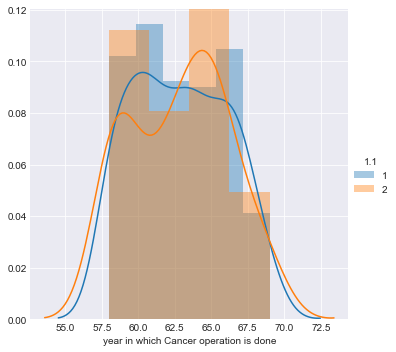

In [24]:
sns.FacetGrid(df,hue="1.1",size=5).map(sns.distplot,"64").add_legend();
plt.xlabel("year in which Cancer operation is done")
plt.show()

### Pdf and Cdf of each parameter


Plotting survival pdf with respect to patient's age

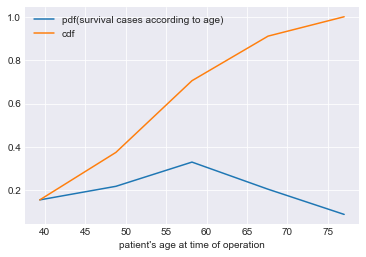

In [29]:
counts,values = np.histogram(live_more_5['30'],bins=5,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(values[1:],pdf,label="pdf(survival cases according to age)")
plt.plot(values[1:],cdf,label="cdf(survival cases according to age)")
plt.xlabel("patient's age at time of operation")
plt.legend()
plt.show()

Plotting non-survival cases with respect to age of patient's

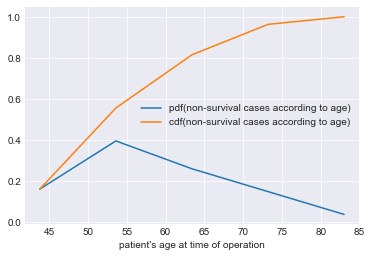

In [31]:
counts,values= np.histogram(live_less_5["30"],density=True,bins=5)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(values[1:],pdf,label="pdf(non-survival cases according to age)")
plt.plot(values[1:],cdf,label="cdf(non-survival cases according to age)")
plt.xlabel("patient's age at time of operation")
plt.legend()
plt.show()

Plotting survival with respect to number of auxilary nodes detected

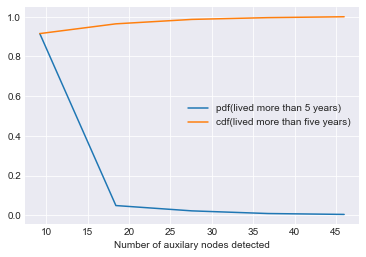

In [32]:
counts,values = np.histogram(live_more_5['1'],density=True,bins=5)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(values[1:],pdf,label="pdf(lived more than 5 years)")
plt.plot(values[1:],cdf,label="cdf(lived more than five years)")
plt.legend()
plt.xlabel("Number of auxilary nodes detected")
plt.show()

### Observation 
* As Number of auxilary nodes increases the chances of survival decreases

Plotting survival and non-survival with respect to number of auxilary nodes detected

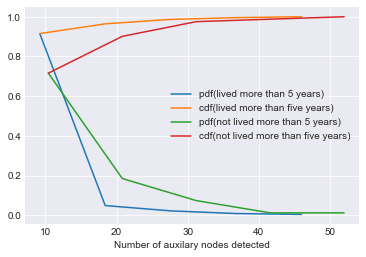

In [33]:
counts,values = np.histogram(live_more_5['1'],density=True,bins=5)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(values[1:],pdf,label="pdf(lived more than 5 years)")
plt.plot(values[1:],cdf,label="cdf(lived more than five years)")
plt.legend()
plt.xlabel("Number of auxilary nodes detected")
counts,values = np.histogram(live_less_5['1'],density=True,bins=5)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(values[1:],pdf,label="pdf(not lived more than 5 years)")
plt.plot(values[1:],cdf,label="cdf(not lived more than five years)")
plt.legend()
plt.xlabel("Number of auxilary nodes detected")
plt.show()

## Statistical parameters of data


This section will evaluate the statistical parameters of the data such as mean Variance std-dev,median percentiles Quantiles etc

In [40]:
print("avg age of survived patient's",np.mean(live_more_5["30"]))
print("    ")
print("avg detected auxilary nodes in survived patient's",np.mean(live_more_5["1"]))
print("    ")
print("avg age of unsurvived patient's",np.mean(live_less_5["30"]))
print("    ")
print("avg detected auxilary nodes of unsurvived patient's",np.mean(live_less_5["1"]))
print("    ")
print("spread age of survived patient's",np.std(live_more_5["30"]))
print("    ")
print("spread detected auxilary nodes in survived patient's",np.std(live_more_5["1"]))
print("    ")
print("spread age of unsurvived patient's",np.std(live_less_5["30"]))
print("    ")
print("spread detected auxilary nodes of unsurvided patient's",np.std(live_less_5["1"]))

avg age of survived patient's 52.11607142857143
    
avg detected auxilary nodes in survived patient's 2.799107142857143
    
avg age of unsurvived patient's 53.67901234567901
    
avg detected auxilary nodes of unsurvived patient's 7.45679012345679
    
spread age of survived patient's 10.913004640364269
    
spread detected auxilary nodes in survived patient's 5.869092706952767
    
spread age of unsurvived patient's 10.10418219303131
    
spread detected auxilary nodes of unsurvided patient's 9.128776076761632


## Observation
* Survived patient's have less number of auxilary nodes detected
* Unsurvived patient's have typically greater number of auxilary nodes

## Median,Percentiles,Quantiles,IQR,Mad

In [42]:
print("<------Median------>")
print("    ")
print("avg age of survived patient's",np.median(live_more_5["30"]))
print("    ")
print("avg dected auxilary nodes in survived patient's",np.median(live_more_5["1"]))
print("    ")
print("avg age of unsurvived patient's",np.median(live_less_5["30"]))
print("    ")
print("avg dectected auxilary nodes survived patient's",np.median(live_less_5["1"]))
print("    ")
print("<------Quantiles------>")
print("Quantiles with respect to auxilary nodes of survived patients",np.percentile(live_more_5["1"],np.arange(0,100,25)))
print("    ")
print("Quantiles with respect to auxilary nodes of unsurvived patients",np.percentile(live_less_5["1"],np.arange(0,100,25)))
print("    ")
print("<------90th Percentile------>")
print("90th percentile of auxilary nodes of survived patients",np.percentile(live_more_5["1"],90))
print("    ")
print("90th percentile of auxilary nodes of unsurvived patients",np.percentile(live_less_5["1"],90))

<------Median------>
    
avg age of survived patient's 52.0
    
avg dected auxilary nodes in survived patient's 0.0
    
avg age of unsurvived patient's 53.0
    
avg dectected auxilary nodes survived patient's 4.0
    
<------Quantiles------>
Quantiles with respect to auxilary nodes of survived patients [0. 0. 0. 3.]
    
Quantiles with respect to auxilary nodes of unsurvived patients [ 0.  1.  4. 11.]
    
<------90th Percentile------>
90th percentile of auxilary nodes of survived patients 8.0
    
90th percentile of auxilary nodes of unsurvived patients 20.0


## Observations from above
* 90% of survived patient's have less than 8 auxilary nodes

### Box plots and Whiskers

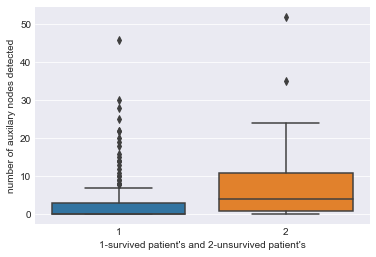

In [46]:
sns.boxplot(x="1.1",y="1",data=df)
plt.xlabel("1-survived patient's and 2-unsurvived patient's")
plt.ylabel("number of auxilary nodes detected")
plt.show()

### Violin Plots

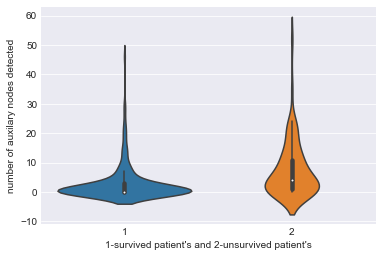

In [47]:
sns.violinplot(x="1.1",y="1",data=df,size=9)
plt.xlabel("1-survived patient's and 2-unsurvived patient's")
plt.ylabel("number of auxilary nodes detected")
plt.show()

### Jointplot

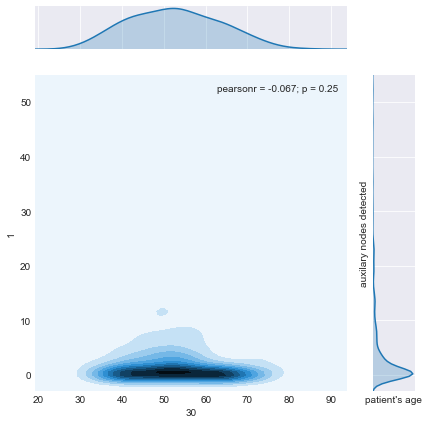

In [58]:
sns.jointplot(x="30",y="1",data=df,kind="kde",space=0.6)
#plt.title("Joint plot of survived patients with detected nodes")
plt.xlabel("patient's age")
plt.ylabel("auxilary nodes detected")
plt.show()

## Final Observations
* Growth in age of person higher the chances of unsurvival
* 'Auxilary nodes detected' is most important feature of detection of patient's survival
* Min age of Operation is 30
* Max age of Operation is 83
* max survival year is 1958 (survival year:- number of patient's survived in that particular year)